In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Ataullha/Demo-Dataset/refs/heads/main/income.csv")

df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:

X = df[['Age', 'Income($)']]

sc = StandardScaler()
X_sc = sc.fit_transform(X)

dbscan = DBSCAN(eps=0.7, min_samples=4)
df['Cluster'] = dbscan.fit_predict(X_sc)

df[['Name', 'Age', 'Income($)', 'Cluster']]

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


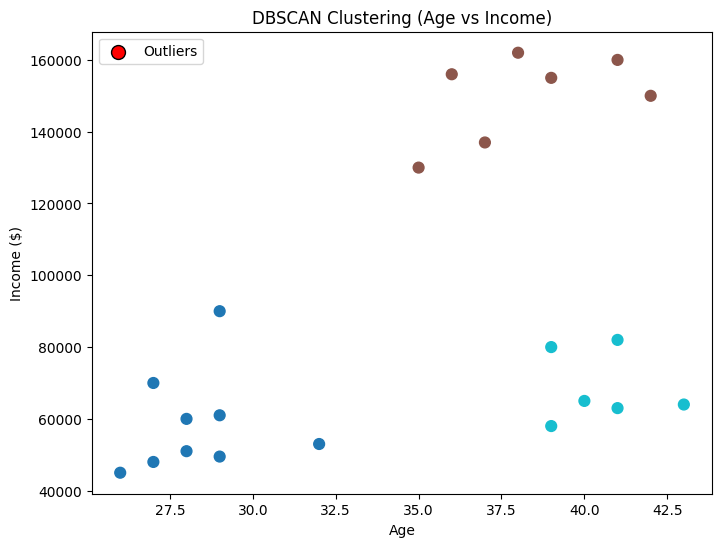

In [4]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df['Age'],
    df['Income($)'],
    c=df['Cluster'],
    cmap='tab10',
    s=60
)

outliers = df[df['Cluster'] == -1]
plt.scatter(
    outliers['Age'],
    outliers['Income($)'],
    color='red',
    label='Outliers',
    edgecolors='black',
    s=100
)

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('DBSCAN Clustering (Age vs Income)')
plt.legend()
plt.show()